In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan_sanction_train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# PARTE 1

## 1.1

Numero istanze dataset:  614
Sono presenti missing values?  True
Numero di missing values:  149
Il dataset è bilanciato rispetto a ''?  False


<AxesSubplot:title={'center':'Count (Loan_Status)'}, xlabel='Loan_Status'>

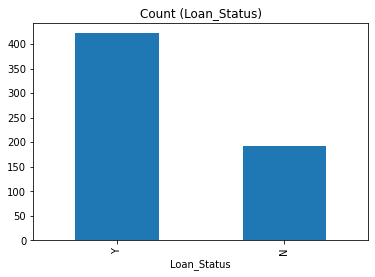

In [4]:
print("Numero istanze dataset: ", len(df))
print("Sono presenti missing values? ", df.isnull().values.any())
print("Numero di missing values: ", df.isnull().sum().sum())
print("Il dataset è bilanciato rispetto a ''? ", df['Loan_Status'].value_counts()[0] == df['Loan_Status'].value_counts()[1])
df['Loan_Status'].value_counts().plot(kind='bar', title='Count (Loan_Status)')

## 1.2

<AxesSubplot:title={'center':'Count (Loan_Status)'}, xlabel='Gender'>

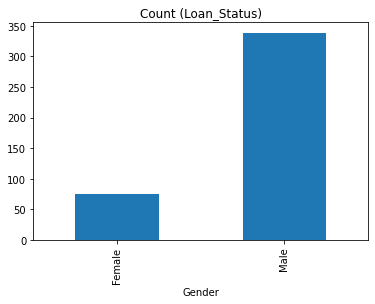

In [5]:
df.loc[df['Loan_Status'] == 'Y'].groupby('Gender').count()['Loan_Status'].plot(kind='bar', title='Count (Loan_Status)')


### Il sesso femminile ha più difficoltà a restituire il prestito rispetto al sesso maschile

In [6]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

pd.pivot_table(df, columns='Married', index= 'Gender', values='Loan_Status')


Married,No,Yes
Gender,,
Female,0.637500,0.741935
Male,0.623077,0.717087


### Percentuale di persone che sono in grado di rimborsare il prestito

## 1.3

In [7]:
#df['LoanAmount'].plot(kind='hist', title='LoanAmount')
df[['LoanAmount', 'Loan_Status']]


,LoanAmount,Loan_Status
0,NaN,1
1,128.0,0
2,66.0,1
3,120.0,1
4,141.0,1
...,...,...
609,71.0,1
610,40.0,1
611,253.0,1
612,187.0,1


## 1.4

<AxesSubplot:title={'center':'Rapporto'}, ylabel='Frequency'>

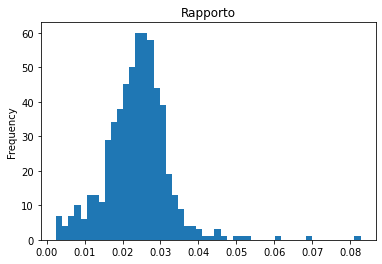

In [8]:
df['Rapporto'] =  df['LoanAmount']/(df['ApplicantIncome']+df['CoapplicantIncome'])
df['Rapporto'].plot(kind='hist', title='Rapporto', bins=50)

 # PARTE 2

## 2.1

In [9]:
from sklearn.preprocessing import LabelEncoder
# Elimino le colonne che non mi servono e i missing values e converto i categorici i numerici
df = df.dropna()
data_label = df['Loan_Status']
data_text = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
categorical = data_text.select_dtypes(include=['object']).columns
le = LabelEncoder()
for cat in categorical:
    data_text[cat] = le.fit_transform(data_text[cat])


DecisionTreeClassifier()
Accuracy train:  1.0
Accuracy test:  0.74375


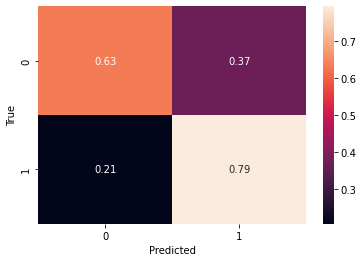



KNeighborsClassifier()
Accuracy train:  0.778125
Accuracy test:  0.625


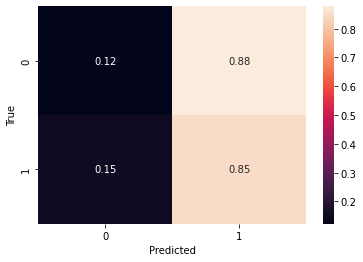



DummyClassifier()
Accuracy train:  0.690625
Accuracy test:  0.69375


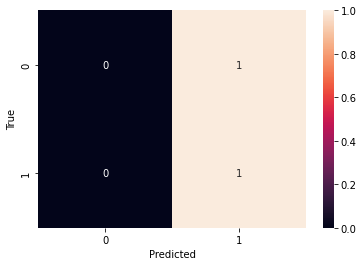

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=1/3, stratify=data_label)
#ho usato stratify per avere un bilanciamento dei dati tra train e test, dato che il dataset è sbilanciato

model = [DecisionTreeClassifier(), KNeighborsClassifier(), DummyClassifier()]

for m in model:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(m)
    print("Accuracy train: ", accuracy_score(y_train, m.predict(X_train)))
    print("Accuracy test: ", accuracy_score(y_test, y_pred))
    cm= confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")


### Come si può notare dalla confusion matrix, il modello non è in grado di predire correttamente i valori della classe 0, ovvero i clienti che non sono in grado di rimborsare il prestito. In ogni caso l'accuracy non è un buon indicatore per valutare la bontà del modello, in quanto il dataset è sbilanciato. Bisognerebbe usare una metrica come la precision o la recall.

## 2.2

In [11]:
# cross validation
from sklearn.model_selection import cross_val_score

for m in model:
    scores = cross_val_score(m, data_text, data_label, cv=10)
    print(m)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("\n")

DecisionTreeClassifier()
Accuracy: 0.72 (+/- 0.12)


KNeighborsClassifier()
Accuracy: 0.65 (+/- 0.09)


DummyClassifier()
Accuracy: 0.69 (+/- 0.02)




## 2.3

In [12]:
from sklearn.model_selection import GridSearchCV


KN = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']}
clf = GridSearchCV(KN, parameters, cv=10)
clf.fit(data_text, data_label)
print(clf.best_params_)
print(clf.best_score_)
print("\n")

{'n_neighbors': 9, 'weights': 'uniform'}
0.6791666666666667




### Con i nuovi parametri il modello rende un po' meglio.

## 2.4

In [13]:
tree = DecisionTreeClassifier()

In [14]:
data_fluid = data_text.drop('Gender', axis=1)
scores = cross_val_score(tree, data_fluid, data_label, cv=10)
print ("Accuracy without Gender: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy without Gender: 0.70 (+/- 0.12)


In [15]:
data_fluid = data_text.drop(['Gender', 'Married'], axis=1)
scores = cross_val_score(tree, data_fluid, data_label, cv=10)
print ("Accuracy without Gender and Married: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy without Gender and Married: 0.72 (+/- 0.10)


## 2.5

In [38]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('loan_sanction_train.csv')
data_label = df['Loan_Status']
df= df.drop(['Loan_Status', 'Loan_ID'], axis=1)

categorical = df.select_dtypes(include=['object']).columns
enc = OrdinalEncoder()
df[categorical] = enc.fit_transform(df[categorical])


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion


imputer = SimpleImputer()
df = imputer.fit_transform(df)
#('cat_enc', OrdinalEncoder(), [categorical])]),
transf = ColumnTransformer([('amount', KBinsDiscretizer(n_bins=10),  ['LoanAmount'])], remainder='passthrough')
union = FeatureUnion([('transf', transf), ('kbest', SelectKBest(k=5)), ('original', 'passthrough')]) # ('original', 'passthrough'): Parametro equivalente alla funzione identity, disponibile solo con la versione più recente di sklearn
preprocess = Pipeline(['''('imputer', SimpleImputer()),''' ('normalizer', Normalizer()), ('union', union)])

pipe = Pipeline([('preprocess', preprocess), ('KN', KNeighborsClassifier())])
pipe.fit(df, data_label)
print("Accuracy train: ", accuracy_score(data_label, pipe.predict(df)))

X_train, X_test, y_train, y_test = train_test_split(df, data_label, test_size=1/3, stratify=data_label)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy train: ", accuracy_score(y_train, pipe.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, y_pred))


<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\dany0\AppData\Local\Temp\ipykernel_24868\1709023966.py:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  preprocess = Pipeline(['''('imputer', SimpleImputer()),''' ('normalizer', Normalizer()), ('union', union)])
C:\Users\dany0\AppData\Local\Temp\ipykernel_24868\1709023966.py:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  preprocess = Pipeline(['''('imputer', SimpleImputer()),''' ('normalizer', Normalizer()), ('union', union)])
C:\Users\dany0\AppData\Local\Temp\ipykernel_24868\1709023966.py:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  preprocess = Pipeline(['''('imputer', SimpleImputer()),''' ('normalizer', Normalizer()), ('union', union)])
C:\Users\dany0\AppData\Local\Temp\ipykernel_24868\1709023966.py:16: SyntaxWarning: 'str

TypeError: 'str' object is not callable

## 2.6 anche se la pipe non va bene

In [26]:
parameters = {'preprocess__union__kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
              'KN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
              'KN__weights': ['uniform', 'distance'],
              'preprocess__transf__amount__n_bins': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
clf = GridSearchCV(pipe, parameters, cv=10)
clf.fit(df, data_label)
print(clf.best_params_)
print(clf.best_score_)

ValueError: Invalid parameter 'transf' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('normalizer', Normalizer()),
                ('union',
                 FeatureUnion(transformer_list=[('transf',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('amount',
                                                                                  KBinsDiscretizer(n_bins=10),
                                                                                  ['LoanAmount'])])),
                                                ('kbest', SelectKBest(k=5)),
                                                ('original', 'passthrough')]))]). Valid parameters are: ['memory', 'steps', 'verbose'].